In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
credits_df = pd.read_csv('../Resources/cleaned_credits.csv')

In [4]:
titles_df = pd.read_csv('../Resources/cleaned_movie_db.csv')

In [5]:
merged_df = credits_df.merge(titles_df, on= "id")
merged_df

,index_x,person_id,id,name,role,index_y,title,movie,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,0,3748,tm84618,Robert De Niro,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
1,1,14658,tm84618,Jodie Foster,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
2,2,7064,tm84618,Albert Brooks,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
3,3,3739,tm84618,Harvey Keitel,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
4,4,48933,tm84618,Cybill Shepherd,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34128,76497,1185475,tm1019084,Antonia Gentry,ACTOR,5720,Ginny & Georgia - The Afterparty,MOVIE,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34129,76498,57076,tm1019084,Jennifer Robertson,ACTOR,5720,Ginny & Georgia - The Afterparty,MOVIE,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34130,76499,85368,tm1019084,Sara Waisglass,ACTOR,5720,Ginny & Georgia - The Afterparty,MOVIE,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34131,77011,2040919,tm1094060,Robin Wiltshire,ACTOR,5777,My Heroes Were Cowboys,MOVIE,2021,PG,23,['documentation'],['US'],tt15084326,NaN,NaN,3.688,7.7


In [6]:
merged_df.name.value_counts()

Fred Armisen                15
Marcus Raboy                15
Jay Karas                   15
Fred Tatasciore             15
Adam Sandler                14
                            ..
AnnaCorey                    1
Moises Amaya                 1
Natalie Stephany Aguilar     1
Derek W. Adam                1
Tyler Greco                  1
Name: name, Length: 26012, dtype: int64

In [7]:
mdf= merged_df.drop(columns=["index_x","index_y", "id", "movie", "person_id", "imdb_id"])
mdf

,name,role,title,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Robert De Niro,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],8.3,795222.0,27.612,8.2
1,Jodie Foster,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],8.3,795222.0,27.612,8.2
2,Albert Brooks,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],8.3,795222.0,27.612,8.2
3,Harvey Keitel,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],8.3,795222.0,27.612,8.2
4,Cybill Shepherd,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],8.3,795222.0,27.612,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...
34128,Antonia Gentry,ACTOR,Ginny & Georgia - The Afterparty,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,7.610,7.8
34129,Jennifer Robertson,ACTOR,Ginny & Georgia - The Afterparty,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,7.610,7.8
34130,Sara Waisglass,ACTOR,Ginny & Georgia - The Afterparty,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,7.610,7.8
34131,Robin Wiltshire,ACTOR,My Heroes Were Cowboys,2021,PG,23,['documentation'],['US'],NaN,NaN,3.688,7.7


In [8]:
cleaned_df = mdf.dropna()

In [9]:
imdb_counts = cleaned_df.imdb_votes.value_counts()
imdb_counts

325132.0    208
371209.0    174
128190.0    150
7013.0      139
300074.0    137
           ... 
166.0         2
3970.0        2
48.0          1
10266.0       1
157.0         1
Name: imdb_votes, Length: 770, dtype: int64

<AxesSubplot:ylabel='Density'>

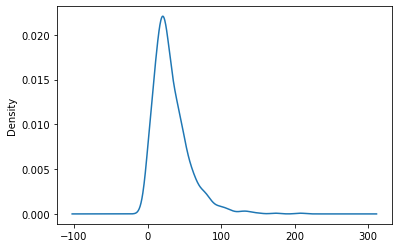

In [10]:
imdb_counts.plot.density()

In [11]:
from numpy import NaN
# Determine which values to replace if greater than 1000.
replace_votes = list(imdb_counts[imdb_counts < 10000].index)

# Replace in DataFrame
for votes in replace_votes:
  if votes <= 50000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("Less than 50000"))
  elif votes < 100000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("50000-99999"))
  elif votes < 150000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("100000-149999"))
  elif votes < 200000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("150000-199999"))
  elif votes < 250000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("200000-249999"))
  elif votes < 300000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("250000-299999"))
  elif votes < 350000:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("300000-349999"))
  else:
    cleaned_df.imdb_votes = cleaned_df.imdb_votes.replace(votes,str("350000+"))

# mdf.imdb_votes = mdf.imdb_votes.astype(str)

# Check if binning was successful
cleaned_df.imdb_votes.value_counts()

Less than 50000    10418
50000-99999         4393
100000-149999       3511
350000+             2294
150000-199999       1359
250000-299999        981
200000-249999        944
300000-349999        839
Name: imdb_votes, dtype: int64

In [12]:
# bin imdb_scores with a cutoff of 8.0 for score
scores = cleaned_df['imdb_score'].copy()

for score in scores:
  if score >= 8.0:
    cleaned_df["imdb_score"] = cleaned_df.imdb_score.replace(score,str("good_score"))
  else:
    cleaned_df["imdb_score"] = cleaned_df.imdb_score.replace(score,str("bad_score"))

# check to see if binning was successful
cleaned_df.imdb_score.value_counts()

bad_score     23630
good_score     1109
Name: imdb_score, dtype: int64

In [13]:
cleaned_df

,name,role,title,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Robert De Niro,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],good_score,350000+,27.612,8.2
1,Jodie Foster,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],good_score,350000+,27.612,8.2
2,Albert Brooks,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],good_score,350000+,27.612,8.2
3,Harvey Keitel,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],good_score,350000+,27.612,8.2
4,Cybill Shepherd,ACTOR,Taxi Driver,1976,R,113,"[''crime'', ''drama'']",['US'],good_score,350000+,27.612,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...
34109,Tone Grøttjord-Glenne,DIRECTOR,Sisters on Track,2021,PG,96,"[''documentation'', ''sport'']",['US'],bad_score,Less than 50000,15.497,7.2
34120,Wenhua Lin,ACTOR,Convergence: Courage in a Crisis,2021,R,113,['documentation'],"[''US'', ''GB'']",bad_score,Less than 50000,9.258,5.2
34121,Sara Khaki,ACTOR,Convergence: Courage in a Crisis,2021,R,113,['documentation'],"[''US'', ''GB'']",bad_score,Less than 50000,9.258,5.2
34122,Mohammad Rezi Eyni,ACTOR,Convergence: Courage in a Crisis,2021,R,113,['documentation'],"[''US'', ''GB'']",bad_score,Less than 50000,9.258,5.2


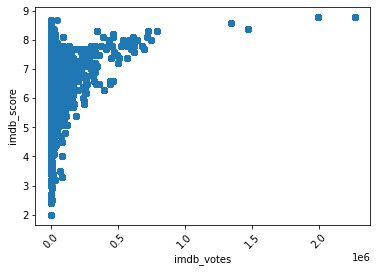

In [14]:
plt.scatter(mdf['imdb_votes'], mdf['imdb_score'])
plt.xlabel('imdb_votes')
plt.ylabel("imdb_score")
plt.xticks(rotation=45)
plt.show()

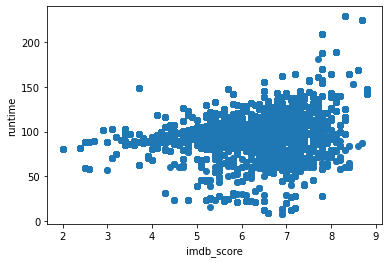

In [15]:
plt.scatter(mdf['imdb_score'], mdf['runtime'])
plt.xlabel('imdb_score')
plt.ylabel('runtime')
plt.show()

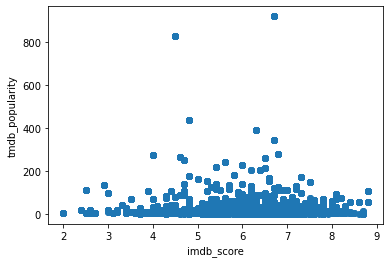

In [16]:
plt.scatter(mdf['imdb_score'], mdf['tmdb_popularity'])
plt.xlabel('imdb_score')
plt.ylabel('tmdb_popularity')
plt.show()

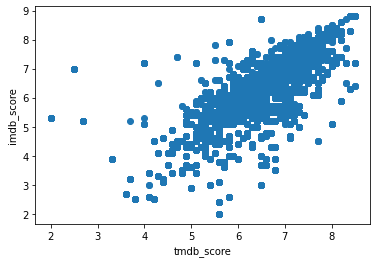

In [17]:
plt.scatter(mdf['tmdb_score'], mdf['imdb_score'])
plt.xlabel('tmdb_score')
plt.ylabel('imdb_score')
plt.show()

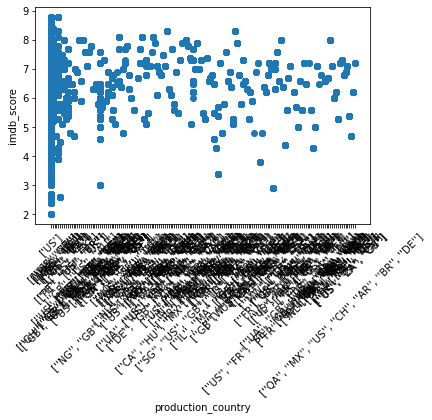

In [18]:
plt.scatter(mdf['production_countries'], mdf['imdb_score'])
plt.xlabel('production_country')
plt.ylabel('imdb_score')
plt.xticks(rotation=45)
plt.show()

In [19]:
X = pd.get_dummies(cleaned_df, columns=["name", "role", "title", "age_certification", "genres", 
                                        "production_countries", "imdb_votes"]).drop("imdb_score", axis=1)
y = cleaned_df["imdb_score"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)
X_train.shape

(18554, 21162)

In [21]:
X.describe()

,release_year,runtime,tmdb_popularity,tmdb_score,name_ Michael Hayden,name_'Weird Al' Yankovic,name_50 Cent,name_50-Grand,name_A$AP Rocky,name_A. Frank Ruffo,...,"production_countries_[''US'', ''ZA'', ''GB'']",production_countries_['US'],imdb_votes_100000-149999,imdb_votes_150000-199999,imdb_votes_200000-249999,imdb_votes_250000-299999,imdb_votes_300000-349999,imdb_votes_350000+,imdb_votes_50000-99999,imdb_votes_Less than 50000
count,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,...,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000,24739.000000
mean,2012.120538,110.534581,33.952299,6.571717,0.000040,0.000040,0.000081,0.000040,0.000040,0.000040,...,0.001859,0.702777,0.141922,0.054934,0.038158,0.039654,0.033914,0.092728,0.177574,0.421116
std,9.290887,22.491052,49.237333,0.809428,0.006358,0.006358,0.008991,0.006358,0.006358,0.006358,...,0.043082,0.457045,0.348977,0.227855,0.191582,0.195149,0.181012,0.290057,0.382161,0.493748
min,1964.000000,13.000000,0.600000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,95.000000,13.293000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,107.000000,19.682000,6.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,122.000000,38.136000,7.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2022.000000,229.000000,919.599000,8.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
y.value_counts()

bad_score     23630
good_score     1109
Name: imdb_score, dtype: int64

In [23]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brfc = BalancedRandomForestClassifier()
brfc.fit(X_train, y_train)

BalancedRandomForestClassifier()

In [24]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = brfc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9981103148395738

In [25]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[5907,    1],
       [   1,  276]])

In [26]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  bad_score       1.00      1.00      1.00      1.00      1.00      1.00      5908
 good_score       1.00      1.00      1.00      1.00      1.00      1.00       277

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      6185



In [27]:
# List the features sorted in descending order by feature importance
priority_features = pd.Series(data=brfc.feature_importances_,index=X.columns)
priority_features.sort_values(ascending=False,inplace=True)
print(priority_features)

tmdb_score                     0.146838
imdb_votes_350000+             0.108559
release_year                   0.084700
runtime                        0.076290
tmdb_popularity                0.051879
                                 ...   
name_Jaclyn Bethany            0.000000
name_Jackson Walker            0.000000
name_Jackson Rathbone          0.000000
name_Jackson Nicoll            0.000000
name_Kenneth William Clarke    0.000000
Length: 21162, dtype: float64


Undersampling

In [28]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'bad_score': 832, 'good_score': 832})

In [29]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [30]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.968010700781416

In [31]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[5594,  314],
       [   3,  274]])

In [32]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  bad_score       1.00      0.95      0.99      0.97      0.97      0.93      5908
 good_score       0.47      0.99      0.95      0.63      0.97      0.94       277

avg / total       0.98      0.95      0.99      0.96      0.97      0.93      6185



Random Oversampling

In [33]:
from collections import Counter
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'bad_score': 17722, 'good_score': 17722})

In [34]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [35]:
y_pred = model.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.9898733040190257

In [36]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[5831,   77],
       [   2,  275]])

In [37]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  bad_score       1.00      0.99      0.99      0.99      0.99      0.98      5908
 good_score       0.78      0.99      0.99      0.87      0.99      0.98       277

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      6185



SMOTE Oversampling

In [38]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(
    X_train, y_train
)
Counter(y_resampled)

Counter({'bad_score': 17722, 'good_score': 17722})

In [39]:
# Train the Logistic Regression model using the resampled data
model_2 = LogisticRegression(solver='lbfgs', random_state=1)
model_2.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [40]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9898733040190257

In [41]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[5831,   77],
       [   2,  275]])

In [42]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  bad_score       1.00      0.99      0.99      0.99      0.99      0.98      5908
 good_score       0.78      0.99      0.99      0.87      0.99      0.98       277

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      6185



SMOTEEEN

In [43]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

Counter({'bad_score': 23626, 'good_score': 23630})

In [44]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [45]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9905503520894388

In [46]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[5839,   69],
       [   2,  275]])

In [47]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  bad_score       1.00      0.99      0.99      0.99      0.99      0.98      5908
 good_score       0.80      0.99      0.99      0.89      0.99      0.98       277

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      6185

